# Unit 10 - Analysing NMR Data from Start to Finish <a class='tocSkip'>
$$\require{mhchem}$$
    
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" title='This work is licensed under a Creative Commons Attribution 4.0 International License.' align="right"/></a>

Author: Dr James Cumby   
Email: james.cumby@ed.ac.uk

### Learning Objectives

This unit covers the learning outcomes of the entire course:
 - Perform numerical operations such as vector algebra and calculate simple statistics on data sets.
 - Write readable, well-documented and modular code.
 - Break a problem into logical steps, and use loops and decision operations to solve tasks.
 - Import and clean experimental data, and choose the appropriate variable types to hold information.
 - Fit models to numerical data, and plot the results in a number of different formats.


### Table of Contents
1. [The Problem](#problem)     
    1.1 [first subitem in toc](#link3)
2. [second item in toc](#link2)



### Further reading for this topic
### FIXME

### Link to documentation:

### FIXME


In this session, we will focus on handling real experimental results using Python, from the initial stage of importing data right through to fitting models and plotting the results.
While you could achieve this manually using Origin or Excel, hopefully you'll see that writing code makes the analysis easier, particularly when you have lots of data!

Note: this session does not intend to teach new concepts, but may inadvertently introduce different ways of achieving the same results. Please ask me/a demonstrator if you unsure.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import sys
import os.path
sys.path.append(os.path.abspath('../'))
from helper_functions.mentimeter import Mentimeter

## 1. The Problem
<a id='problem'></a>
> Do you get more peaks in the <sup>1</sup>H NMR spectrum if you have an odd number of heteroatoms compared with an even number?

The information available is a CSV file containing the number of heteroatoms and an identifier for the molecules, and a folder of NMR data with the matching identifiers. You do not know the chemical formulae.

### 1.1 Surveying the class
<img src="images/mentimeter_1.png" alt="isolated" width="400"/>

# Tasks

You will work in pairs or small groups to try and answer this question, with help and guidance from academic demonstrators. Don't worry if you can't immediately solve the problem - try out a few ideas, and ask for help when you're ready!

If you get stuck don't panic - you will be given hints throughout the workshop, and a model answer will be made available after the session.

<div class="alert alert-success">
<b>Task 1.1 Thinking about the problem</b>

In small groups, discuss the following:
- the chemistry behind the problem;
- what steps are required to solve the problem.

As you discuss your ideas, add steps to the mentimeter:
</div>

<img src="images/mentimeter_2.png" alt="isolated" width="400"/>

<details><summary {style='color:green;font-weight:bold'}> Click here to see solution to Task. </summary>
    
Some ideas:
- Collect NMR data
- Collect information on hetero atoms
- most abundant isotopes of heteroatoms
</details>

<!-- begin silent_answer -->
## 2. Step 1: Import files
<a id='important files'></a>


## Task 1
1. Import the `NMR_summary.csv` file
2. Work out how to read a single NMR spectrum from a file
3. Write a function that can read in all NMR files
<!-- end silent_answer -->

<!-- begin silent_answer -->
### 1.1 - Import summary file
First, we need to import the summary data file; here we'll use Pandas.
<!-- end silent_answer -->

In [6]:
### begin silent_answer
# Add cells here as required
### end silent_answer

In [7]:
### begin silent_answer
!head data_sources/NMR_summary.csv
### end silent_answer

Molecule_ID;heteroatom_count
1;0
2;2
3;1
4;1
5;2
6;2
7;3
8;3
9;3


In [8]:
### begin silent_answer
summary = pd.read_csv('data_sources/NMR_summary.csv', sep=';')
summary.head()
### end silent_answer

,Molecule_ID,heteroatom_count
0,1,0
1,2,2
2,3,1
3,4,1
4,5,2


In [9]:
### begin silent_answer
summary = summary.set_index('Molecule_ID')
summary.head()
### end silent_answer

,heteroatom_count
Molecule_ID,
1,0
2,2
3,1
4,1
5,2


<!-- begin silent_answer -->
### 1.2 - Read in NMR data file
First, we need to work out how to read one file
<!-- end silent_answer -->

In [10]:
### begin silent_answer
# Add cells here as required
### end silent_answer

In [11]:
### begin silent_answer
NMR = pd.read_csv('data_sources/NMR_data/1.txt', sep='\t', names=['a','b','c'])
NMR.head()
### end silent_answer

,a,b,c
0,13.796019,-0.050616,0.263138
1,13.795790,-0.057511,0.248825
2,13.795560,-0.047204,0.235817
3,13.795331,-0.030370,0.238590
4,13.795102,-0.023873,0.254259


<AxesSubplot:>

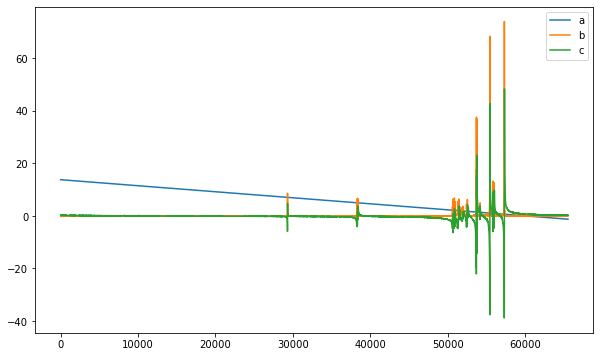

In [12]:
### begin silent_answer
NMR.plot(figsize=(10,6))
### end silent_answer

In [13]:
### begin silent_answer
NMR = pd.read_csv('data_sources/NMR_data/1.txt', sep='\t', names=['shift','intensity','derivative'])
NMR.head()
### end silent_answer

,shift,intensity,derivative
0,13.796019,-0.050616,0.263138
1,13.795790,-0.057511,0.248825
2,13.795560,-0.047204,0.235817
3,13.795331,-0.030370,0.238590
4,13.795102,-0.023873,0.254259


<AxesSubplot:xlabel='shift'>

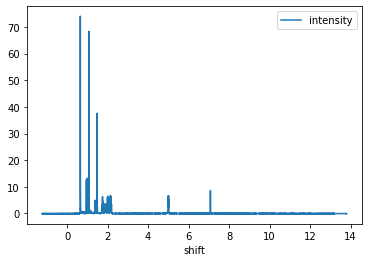

In [14]:
### begin silent_answer
NMR.plot(x='shift', y='intensity')
### end silent_answer

<!-- begin silent_answer -->
### 1.3 - Read in all NMR files
Now we can read one file, we should write a function that can read them all.
<!-- end silent_answer -->

**Question:** How should we store the NMR data we read in?

In [15]:
Mentimeter(vote = 'https://www.menti.com/osdx6tb2oe').show()

In [16]:
### begin tutor
Mentimeter(result = 'https://www.mentimeter.com/s/75235f4a0888cb6105d2ed61b8defe74/89f2316ae869').show()
### end tutor

<!-- begin silent_answer -->
![NMR data storage poll results](https://static.mentimeter.com/screenshot/1-how-should-we-store-the-nmr-data.jpg?url=https%3A%2F%2Fwww.mentimeter.com%2Fs%2F75235f4a0888cb6105d2ed61b8defe74%2F89f2316ae869%2Fpreview&maxage=600&w=1920&h=1080&cache_buster=7)
<!-- end silent_answer -->

In [1]:
### begin livecode
# Add cells here as required
### end livecode

In [18]:
### begin silent_answer
def read_NMR_data(NMR):
    """ Read NMR data. """

    data = pd.read_csv(NMR, sep='\t', names=['shift','intensity','derivative'])
    return data

read_NMR_data('data_sources/NMR_data/10.txt')
    
### end silent_answer

,shift,intensity,derivative
0,14.202218,-0.064711,0.059473
1,14.201989,-0.066458,0.048571
2,14.201760,-0.056322,0.038129
3,14.201530,-0.040992,0.040142
4,14.201301,-0.034111,0.052170
...,...,...,...
65531,-0.826316,-0.058335,0.063376
65532,-0.826545,-0.066090,0.063032
65533,-0.826775,-0.070918,0.056772
65534,-0.827004,-0.069708,0.051623


In [19]:
### begin silent_answer
NMR_data = {}
for ID in summary.index:
    NMR_file = 'data_sources/NMR_data/' + str(ID) + '.txt'
    NMR_data[ID] = read_NMR_data(NMR_file)
    
NMR_data[11]
### end silent_answer

,shift,intensity,derivative
0,13.808344,-0.063278,0.077326
1,13.808115,-0.059682,0.071795
2,13.807885,-0.054798,0.070505
3,13.807656,-0.052117,0.071388
4,13.807427,-0.050141,0.071391
...,...,...,...
65531,-1.220190,-0.057293,0.056825
65532,-1.220420,-0.056044,0.069937
65533,-1.220649,-0.065017,0.077379
65534,-1.220878,-0.074770,0.075543


<!-- begin silent_answer -->
# NMR data exploration

To answer the problem
> Do you get more peaks in the <sup>1</sup>H NMR spectrum if you have an odd number of heteroatoms compared with an even number?

we will need to determine the number of peaks in a spectrum. 

To peak search automatically, we need the NMR data to have similar numerical values. Things to check are: 

- What range of chemical shift do they cover?
- What is the maximum intensity?
- How noisy is the baseline?
<!-- end silent_answer -->

<!-- begin silent_answer -->
## Task 2
1. Write a function that can quantify the following information:
    - Range of chemical shifts
    - Maximum intensity
    - Level of noise in the spectrum background
2. Extract and store these values for all NMR data
3. Plot histograms of each of each parameter, and decide whether any corrections to the data are required
4. Make any corrections required
<!-- end silent_answer -->

<!-- begin silent_answer -->
### 2.1/2.2 - Extract key features from each spectrum
<!-- end silent_answer -->

In [20]:
### begin silent_answer

# Calculate shift range
min_shift = NMR_data[1]['shift'].min()
max_shift = NMR_data[1]['shift'].max()
shift_range = max_shift - min_shift

print( f"Spectrum covers {shift_range:.3f} ppm from {min_shift:.3f} to {max_shift:.3f} ppm.")

# Calculate max intensity
max_intensity = NMR_data[1]['intensity'].max()
print( f"Maximum intensity is {max_intensity:.3f}.")

# Calculate baseline
number_of_points = NMR_data[1].shape[0]
baseline_std = NMR_data[1]['intensity'].nsmallest(n = int(number_of_points*0.5)).std()
print( f"Baseline noise is {baseline_std:.3f}.")

### end silent_answer

Spectrum covers 15.029 ppm from -1.233 to 13.796 ppm.
Maximum intensity is 74.038.
Baseline noise is 0.016.


In [21]:
### begin silent_answer
# Now, we convert the code above into a function that can work for any NMR DataFrame

def summary_statistics(NMR_data, ID):
    """ Return summary statistics for an NMR spectrum. """
    
    # Calculate shift range
    min_shift = NMR_data[ID]['shift'].min()
    max_shift = NMR_data[ID]['shift'].max()
    shift_range = max_shift - min_shift

    # Calculate max intensity
    max_intensity = NMR_data[ID]['intensity'].max()

    # Calculate baseline
    num_points = NMR_data[ID].shape[0]
    baseline_std = NMR_data[ID]['intensity'].nsmallest(n = int(num_points*0.5)).std()
    
    return shift_range, max_intensity, baseline_std
### end silent_answer

In [22]:
### begin silent_answer
for ID in summary.index:
    stats = summary_statistics(NMR_data, ID)
    summary.loc[ID, ['shift_range', 'max_intensity', 'baseline_std']] = stats
    
summary.head()
### end silent_answer

,heteroatom_count,shift_range,max_intensity,baseline_std
Molecule_ID,,,,
1,0,15.029452,74.038383,0.016211
2,2,15.029452,39.278263,0.023142
3,1,15.029451,95.329765,0.018059
4,1,15.029451,22.837284,0.010094
5,2,15.029451,265.857788,0.013083


In [23]:
### begin silent_answer
summary.describe()
### end silent_answer

,heteroatom_count,shift_range,max_intensity,baseline_std
count,58.000000,58.000000,58.000000,58.000000
mean,2.086207,15.126457,505.006272,0.029138
std,1.013669,0.738770,2500.020776,0.092283
min,0.000000,15.029451,17.880037,0.005242
25%,1.250000,15.029451,57.246149,0.013050
50%,2.000000,15.029452,134.940987,0.016268
75%,3.000000,15.029452,269.394150,0.020450
max,6.000000,20.655757,19181.949219,0.718201


<!-- begin silent_answer -->
### 2.3 - Plot histograms across all NMR data
<!-- end silent_answer -->

Text(0.5, 0, 'Chemical shift range')

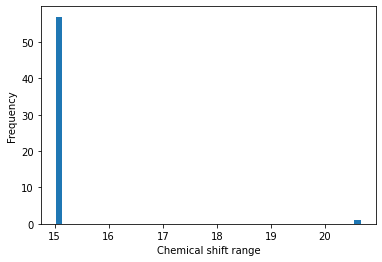

In [24]:
### begin silent_answer
fig = plt.figure()
ax = fig.add_subplot()
summary['shift_range'].plot(kind='hist', bins=50, ax=ax, label='ppm range')
ax.set_xlabel('Chemical shift range')
### end silent_answer

Text(0.5, 0, 'Maximum intensity')

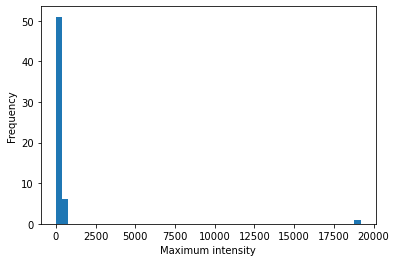

In [25]:
### begin silent_answer
fig = plt.figure()
ax = fig.add_subplot()
summary['max_intensity'].plot(kind='hist', bins=50, ax=ax, label='Maximum intensity')
ax.set_xlabel('Maximum intensity')
### end silent_answer

Text(0.5, 0, 'Baseline standard deviation')

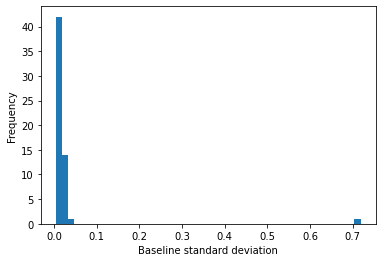

In [26]:
### begin silent_answer
fig = plt.figure()
ax = fig.add_subplot()
summary['baseline_std'].plot(kind='hist', bins=50, ax=ax, label='Baseline sigma')
ax.set_xlabel('Baseline standard deviation')
### end silent_answer

<!-- begin silent_answer -->
### 2.4 - Apply corrections to standardise the data

For peak searching to work effectively, we need to standardise our data. The simplest change would be to normalise the intensity values so that, e.g. the maximum is 100.
<!-- end silent_answer -->

In [27]:
### begin silent_answer
# Add cells here as required
### end silent_answer

In [28]:
### begin silent_answer
for ID in summary.index:
    NMR_data[ID]['intensity'] = NMR_data[ID]['intensity'] / NMR_data[ID]['intensity'].max() * 100
### end silent_answer

In [29]:
### begin silent_answer
for ID in summary.index:
    stats = summary_statistics(NMR_data, ID)
    summary.loc[ID, ['shift_range', 'max_int', 'baseline_std']] = stats
### end silent_answer

Text(0.5, 0, 'Baseline standard deviation')

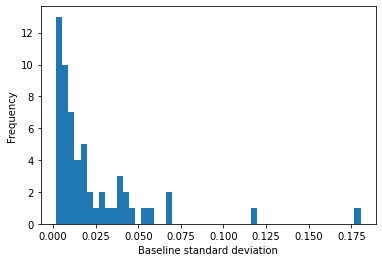

In [30]:
### begin silent_answer
fig = plt.figure()
ax = fig.add_subplot()
summary['baseline_std'].plot(kind='hist', bins=50, ax=ax, label='Baseline sigma')
ax.set_xlabel('Baseline standard deviation')
### end silent_answer

<!-- begin silent_answer -->
# NMR peak hunting

A number of different peak finding algorithms exist, but here we will focus on `scipy.signal.find_peaks` that you saw in session 7. Use this to determine the number of peaks in each NMR spectrum, and store these values for plotting. We can optimise the peak finding using the `prominence` parameter (in this case; other problems might need different parameters).
<!-- end silent_answer -->

<!-- begin silent_answer -->
## Task 3
1. Write a function capable of extracting peaks from any of the NMR spectra
2. Test how the peak-fitting parameters affect the number of peaks determined
    > Hint: "prominence" is particularly useful for these peak shapes
3. Optimise these parameter(s) to determine the number of peaks in each spectrum
<!-- end silent_answer -->

<!-- begin silent_answer -->
### 3.1 - Function to extract peaks
<!-- end silent_answer -->

In [31]:
### begin silent_answer
# Add cells here as required
### end silent_answer

In [32]:
### begin silent_answer
from scipy.signal import find_peaks
### end silent_answer

Text(0, 0.5, 'Normalised intensity')

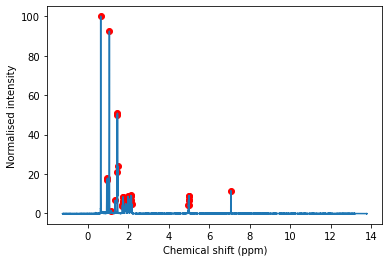

In [47]:
### begin silent_answer
ID = 1
peaks, peak_info = find_peaks(NMR_data[ID]['intensity'],
                              prominence = 1,
                             )


fig = plt.figure()
ax = fig.add_subplot()

ax.plot(NMR_data[ID]['shift'], NMR_data[ID]['intensity'])
ax.scatter(NMR_data[ID]['shift'][peaks],
           NMR_data[ID]['intensity'][peaks],
           color='r'
          )

ax.set_xlabel('Chemical shift (ppm)')
ax.set_ylabel('Normalised intensity')

#ax.set_xlim(7.3,8)
#ax.set_ylim(0,20)
### end silent_answer

In [48]:
### begin silent_answer
def count_peaks(NMR_data, ID, prominence):
    """ Return the number of peaks in an NMR spectrum. """
    
    peaks, peak_info = find_peaks(NMR_data[ID]['intensity'],
                                  prominence = prominence,
                                  )
    
    return len(peaks)
### end silent_answer

<!-- begin silent_answer -->
### 3.2 - Optimising the prominence parameter

To find peaks automatically we need to choose a prominence value. Let's systematically test a few different ones and see what the effect is on number of peaks. There are many ways to tackle this, but here we'll use the power of pandas to plot multiple curves quickly (and neatly)!
<!-- end silent_answer -->

In [35]:
### begin silent_answer
# Add cells here as required
### end silent_answer

In [36]:
### begin silent_answer
prominence_range = np.arange(0.1, 5, 0.2)


# Make an empty DataFrame with 'prominence value' as the row index and 'ID' as the columns
prom_testing = pd.DataFrame(index=prominence_range, columns=summary.index)

for prom in prom_testing.index:
    for ID in prom_testing.columns:
        prom_testing.loc[prom, ID] = count_peaks(NMR_data, ID, prom)
### end silent_answer

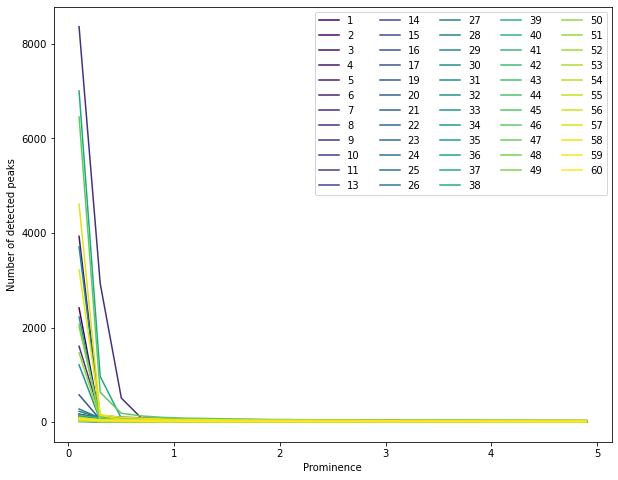

In [60]:
### begin silent_answer
ax = prom_testing.plot(figsize=(10,8), colormap='viridis')
ax.set_xlabel('Prominence')
ax.set_ylabel('Number of detected peaks')
ax.legend(ncol=5)
### end silent_answer

<!-- begin silent_answer -->
### 3.3 - Optimise the parameters and extract peak count

A prominence above ~1 seems to give a fairly constant number of peaks, but anything below this gives a number of peaks strongly dependent on this parameter.

We will choose prominence = 1 to avoid biasing the number of peaks in one spectrum over another. It is possible that we are missing some "real" peaks, but we are unlikely to do better in one spectrum than another.
<!-- end silent_answer -->

In [61]:
### begin silent_answer
# Calculate number of peaks using optimum prominence value
for ID in summary.index:
    summary.loc[ID,'num_peaks'] = count_peaks(NMR_data, ID, prominence=1)
### end silent_answer

<!-- begin silent_answer -->
## Analysing the results

Now we have computed the number of peaks, we can this for each spectrum in order to answer the original question.
<!-- end silent_answer -->

<!-- begin silent_answer -->
### Task 4

Plot graphs to determine whether the number of heteroatoms influences the number od NMR peaks.
<!-- end silent_answer -->

In [62]:
### begin silent_answer
# Add cells here as required
### end silent_answer

Text(0.5, 0.98, '')

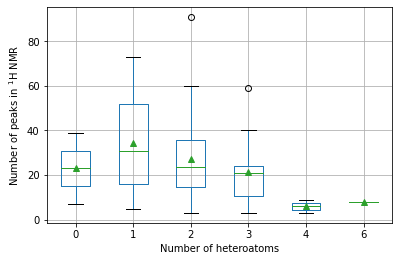

In [97]:
### begin silent_answer
ax = summary.boxplot(column = 'num_peaks', by='heteroatom_count', showmeans=True)
ax.set_xlabel('Number of heteroatoms')
ax.set_ylabel('Number of peaks in $^1$H NMR')

# We need these lines to remove the additional "title" text
# (try commenting them to see what happens)
ax.set_title('')
ax.get_figure().suptitle('')
### end silent_answer

In [100]:
### begin silent_answer
summary['even_heteroatoms'] = (summary['heteroatom_count'] % 2) == 0
### end silent_answer

Text(0.5, 0.98, '')

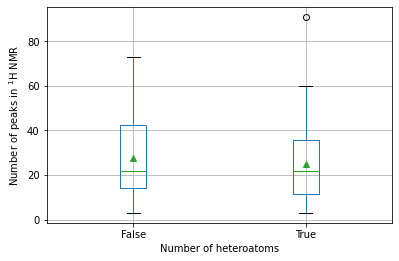

In [102]:
### begin silent_answer
ax = summary.boxplot(column = 'num_peaks', by='even_heteroatoms', showmeans=True)
ax.set_xlabel('Number of heteroatoms')
ax.set_ylabel('Number of peaks in $^1$H NMR')

# We need these lines to remove the additional "title" text
# (try commenting them to see what happens)
ax.set_title('')
ax.get_figure().suptitle('')
### end silent_answer

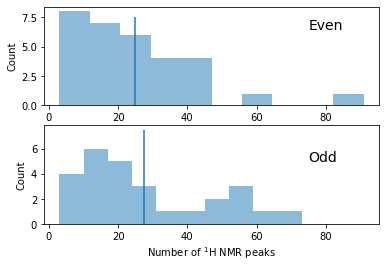

In [138]:
### begin silent_answer
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212, sharex=ax1)
ax1.hist(summary[summary['even_heteroatoms']]['num_peaks'], alpha=0.5)
ax2.hist(summary[~summary['even_heteroatoms']]['num_peaks'], alpha=0.5)

ax2.set_xlabel('Number of $^1$H NMR peaks')
ax1.set_ylabel('Count')
ax2.set_ylabel('Count')

ax1.text(75,6.5, 'Even', fontsize=14)
ax2.text(75,5, 'Odd', fontsize=14)

ax1.vlines(summary[summary['even_heteroatoms']]['num_peaks'].mean(), 0, 7.5)
ax2.vlines(summary[~summary['even_heteroatoms']]['num_peaks'].mean(), 0, 7.5)
### end silent_answer

<!-- begin silent_answer -->
# Conclusions

- The number of <sup>1</sup>H NMR peaks appears to decrease with increasing numbers of heteratoms
    - This may just be due to a smaller number of compounds in this range
- Molecules with one heteroatom show the highest number of NMR peaks on average
- Comparing odd with even numbers of heteratoms, there is little evidence from these data of any difference
    - Further work would be to apply statistical testing on these distributions, ideally using a greater number of measurements.
<!-- end silent_answer -->

# Feedback

In [ ]:
Mentimeter(vote='https://www.menti.com/8tfwaasctc').show()

In [ ]:
Mentimeter(vote='https://www.menti.com/1292v5zbqw').show()

# Tasks to complete after this session

- Read through the notebook with answers, and check that you have understood the steps
- Find and read the documentation for any Python commands you are less familiar with
- Think about other ways to solve the problem, and try to implement/compare them
- Extend your analysis to explore other peak searching approaches (or parameters)
- Use statistical methods to determine any